In [1]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the Mosquito-Human Malaria model in p147 of Shifflet/Shifflet

    Arguments:
        w :  vector of the state variables:
                  w = [I,P,H,M,V]
        t :  time
        p :  vector of the parameters:
                  p = [i, r, k_blue, d_h, b, d, k_green]
    """
    I,P,H,M,V = w
    i, r, k_blue, d_h, b, d, k_green = p

    # Create f = (I',P',H',M',V'):
    f = [i*H,
         r*H - k_blue*V*P/float(V+M),
         k_blue*V*P/float(V+M) - (d_h+i+r)*H,
         b*(M+V) - d*M - k_green*H*M/float(P+H+I),
         k_green*H*M/float(P+H+I) - d*V]
    return f

In [2]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Immunity rate:
i = 0.01
# Recovery rate:
r = 0.3
# Probability of being bitten / biting 
k_blue = 0.3
k_green = 0.3
# death rate due to infection
d_h = 0.005
#birth rate of mosquitos
b = 0.011
# death rate for mosquitos assumed indepdent of state
d = 0.01

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
I = 0.0
P = 300.0
H = 1.0
M = 300.0
V = 0.0

# ODE solver parameters
abserr = 1.0e-14
relerr = 1.0e-12
stoptime = 200.0
numpoints = 2500

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(counter) / (numpoints - 1) for counter in range(numpoints)]

# Pack up the parameters and initial conditions:
w0 = [I,P,H,M,V]
p = [i, r, k_blue, d_h, b, d, k_green] 
    
# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr) 

print stoptime/float(numpoints)

0.08


C:\Users\Bennett\Anaconda2\lib\site-packages\matplotlib\patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


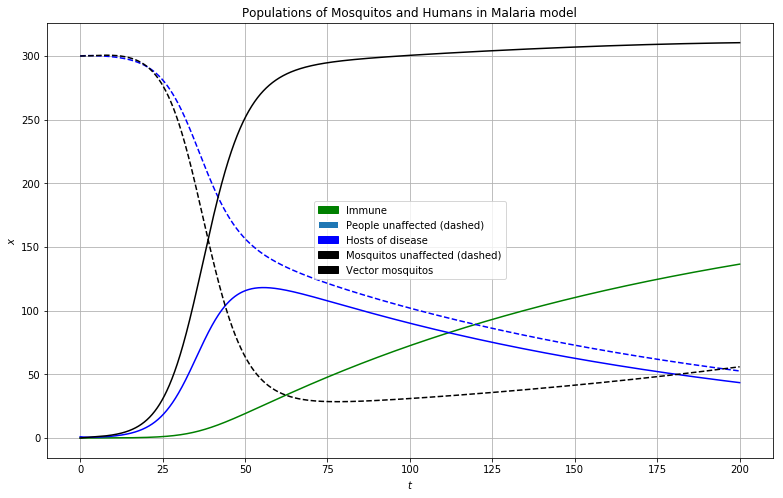

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy
from pylab import rcParams
rcParams['figure.figsize'] = 13,8

I = numpy.empty(len(wsol), dtype=object)
P = numpy.empty(len(wsol), dtype=object)
H = numpy.empty(len(wsol), dtype=object)
M = numpy.empty(len(wsol), dtype=object)
V = numpy.empty(len(wsol), dtype=object)

for el in range(0,len(wsol)):
    I[el],P[el],H[el],M[el],V[el] = wsol[el]
    
# Note that using plt.subplots below is equivalent to using
# fig = plt.figure() and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()

ax.set(xlabel='$t$', ylabel='$x$',
       title='Populations of Mosquitos and Humans in Malaria model')
ax.grid()

ax.plot(t,I,'g')
ax.plot(t,P,'b--')
ax.plot(t,H,'b')
ax.plot(t,M,'k--')
ax.plot(t,V,'k')

I_patch = mpatches.Patch(color='green', label='Immune')
P_patch = mpatches.Patch(edgecolor= 'white', label='People unaffected (dashed)')
H_patch = mpatches.Patch(color='blue', label='Hosts of disease')
M_patch = mpatches.Patch(edgecolor= 'white', color='black', label='Mosquitos unaffected (dashed)')
V_patch = mpatches.Patch(color='black', label='Vector mosquitos')

plt.legend(handles=[I_patch,P_patch,H_patch,M_patch,V_patch])
 
plt.savefig('Malaria.png')
plt.show()

In [4]:
H[-1],P[-1],I[-1], M[-1], V[-1]

(43.50006760742182,
 52.66184107993699,
 136.55872754176085,
 55.95430787667413,
 310.4665195713772)